## 🌟 **Don't Fear Machine Learning!** 🌟

📖 **Welcome**
Benvenuti a questo workshop introduttivo in cui demistifichiamo il mondo del machine learning!

Dall'importazione delle librerie necessarie alla valutazione delle prestazioni del modello, questo notebook funge da guida completa per i principianti.

🛠️ **Cosa Imparerai**
- Come preparare e pulire i tuoi dati per l'analisi
- Tecniche di base per l'analisi esplorativa dei dati
- Addestramento del modello e previsione
- Valutazione delle prestazioni del modello

👀 **Cosa Cercare**
Ogni cella di codice è preceduta da una cella Markdown che ne descrive a grandi linee il codice. Questo ti aiuterà a capire il flusso e lo scopo di ogni cella.

🤝 **Iniziamo!**
Quindi allacciate le cinture e imbarcatevi alla scoperta del machine learning!


### Import delle librerie

Don't reinvent the wheel. In questa cella importiamo tutto quello che ci serve per andare spediti nell'analisi dei dati e nella costruzione dei nostri modelli.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from IPython.display import Image


plt.rcParams['figure.figsize'] = [10.0, 5.0]
plt.rcParams['figure.dpi'] = 150



## Caricamento del dataset

Da [questo URL](https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset) potete scaricare il dataset. Questa cella apre il nostro set di dati e lo prepara per le avventure a venire!

**OCCHIO**! Prima di caricare i dati dovrete eseguire questa cella per poter accedere ai vostri file di Google Drive:

```
import os
import pandas as pd
from google.colab import drive

drive.mount("/content/drive", force_remount=True)
os.chdir("/content/drive/My Drive/fifa22workshop")


```



In [2]:
# import os
# import pandas as pd
# from google.colab import drive

# drive.mount("/content/drive", force_remount=True)
# os.chdir("/content/drive/My Drive/fifa22workshop")

# Load the dataset
df = pd.read_csv("dataset/players_22.csv")

df.head(5)

/var/folders/bp/vpf4133s7wjb10lznth5p4900000gn/T/ipykernel_96505/813564335.py:9: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("dataset/players_22.csv")


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [3]:
print(df.shape)
print(df.iloc[0]['short_name'])
Image(url=df.iloc[0]['player_face_url'])

(19239, 110)
L. Messi


In [4]:
print(df.columns.shape)
df.columns.values

(110,)


array(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur',
       'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id',
       'club_name', 'league_name', 'league_level', 'club_position',
       'club_jersey_number', 'club_loaned_from', 'club_joined',
       'club_contract_valid_until', 'nationality_id', 'nationality_name',
       'nation_team_id', 'nation_position', 'nation_jersey_number',
       'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'player_traits', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'moveme

### Cleaning di base

Non ci interessano le colonne contenenti stringhe, quindi sicuramente andremo ad eliminarle.

Inoltre usiamo un **`KNNImputer`** per riempire i dati mancanti.

### Come Funziona il KNNImputer

Il KNNImputer è un metodo utilizzato per gestire i valori mancanti in un set di dati. Il suo funzionamento è basato sull'algoritmo dei K-Vicini Più Vicini (K-Nearest Neighbors, KNN).

📚 **Principi di Base**
Supponiamo di avere un set di dati con alcune celle vuote (valori mancanti). L'obiettivo è riempire queste celle in modo che la nuova informazione sia quanto più possibile coerente con i dati esistenti.

📍 **Passaggi Fondamentali**
1. Per ogni punto con valori mancanti, il KNNImputer identifica i "K" punti più vicini nel set di dati, utilizzando una metrica di distanza (come la distanza euclidea).
2. I valori mancanti sono quindi stimati come una media ponderata dei "K" vicini più vicini.

🔍 **Esempio Semplice**
Supponiamo di avere una serie di altezze e pesi, ma manca il peso per una persona. Il KNNImputer troverebbe le "K" persone più simili in termini di altezza e utilizzerebbe i loro pesi per stimare il peso mancante.

🛠️ **Applicazione**
Questo metodo è particolarmente utile quando i dati sono distribuiti in modo non casuale e le osservazioni simili tendono ad avere valori simili.


In [5]:
df = df.select_dtypes(exclude=['object'])

print(f"Number of missing values BEFORE imputation: {df.isnull().sum().sum()}")

imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns.values)

missing_values_count = df_imputed.isnull().sum().sum()

print(f"Number of missing values after imputation: {missing_values_count}")


Number of missing values BEFORE imputation: 68414
Number of missing values after imputation: 0


In [6]:
df_imputed

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,158023.0,93.0,93.0,78000000.0,320000.0,34.0,170.0,72.0,73.0,1.0,...,96.0,20.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0,32.6
1,188545.0,92.0,92.0,119500000.0,270000.0,32.0,185.0,81.0,21.0,1.0,...,88.0,35.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,32.6
2,20801.0,91.0,91.0,45000000.0,270000.0,36.0,187.0,83.0,11.0,1.0,...,95.0,24.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0,37.4
3,190871.0,91.0,91.0,129000000.0,270000.0,29.0,175.0,68.0,73.0,1.0,...,93.0,35.0,32.0,29.0,9.0,9.0,15.0,15.0,11.0,42.8
4,192985.0,91.0,91.0,125500000.0,350000.0,30.0,181.0,70.0,10.0,1.0,...,89.0,68.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0,32.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962.0,47.0,52.0,70000.0,1000.0,22.0,180.0,64.0,112541.0,1.0,...,37.0,38.0,43.0,48.0,6.0,10.0,5.0,15.0,13.0,23.8
19235,262040.0,47.0,59.0,110000.0,500.0,19.0,175.0,70.0,445.0,1.0,...,47.0,37.0,44.0,47.0,11.0,12.0,6.0,8.0,10.0,25.0
19236,262760.0,47.0,55.0,100000.0,500.0,21.0,178.0,72.0,111131.0,1.0,...,36.0,38.0,44.0,48.0,8.0,6.0,7.0,10.0,6.0,29.8
19237,262820.0,47.0,60.0,110000.0,500.0,19.0,173.0,66.0,111131.0,1.0,...,47.0,10.0,14.0,11.0,7.0,10.0,7.0,14.0,15.0,24.0


### For the sake of simplicity...

... prendiamo solo un subset delle colonne del dataset. Solo per rendere le cose più semplici e veloci.

In [7]:
subset = [ 'overall', 'wage_eur', 'age', 'skill_moves', 'pace', 'shooting', 'passing', 'defending']

df_subset = df_imputed[subset]
print(df_subset.shape)
df_subset.head(5)

(19239, 8)


,overall,wage_eur,age,skill_moves,pace,shooting,passing,defending
0,93.0,320000.0,34.0,4.0,85.0,92.0,91.0,34.0
1,92.0,270000.0,32.0,4.0,78.0,92.0,79.0,44.0
2,91.0,270000.0,36.0,5.0,87.0,94.0,80.0,34.0
3,91.0,270000.0,29.0,5.0,91.0,83.0,86.0,37.0
4,91.0,350000.0,30.0,4.0,76.0,86.0,93.0,64.0


In [8]:
df_subset.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,19239.0,65.772182,6.880232,47.0,61.0,66.0,70.0,93.0
wage_eur,19239.0,9021.173138,19450.399802,500.0,1000.0,3000.0,8000.0,350000.0
age,19239.0,25.210822,4.748235,16.0,21.0,25.0,29.0,54.0
skill_moves,19239.0,2.352461,0.767659,1.0,2.0,2.0,3.0,5.0
pace,19239.0,68.080254,10.535031,28.0,62.2,69.0,75.0,97.0
shooting,19239.0,52.615209,13.378001,18.0,43.0,54.8,62.0,94.0
passing,19239.0,57.563075,9.621806,25.0,52.0,58.0,64.0,93.0
defending,19239.0,51.964562,15.500489,14.0,39.1,56.0,64.0,91.0


## Standardizzazione

Uno dei processi più comuni di preprocessing dei dati è la **standardizzazione**. La standardizzazione è il processo di ridimensionamento dei dati in modo che abbiano una media (media aritmetica) pari a zero zero e una deviazione standard di uno.

Questo è particolarmente utile quando gli algoritmi di apprendimento automatico sono sensibili alla scala delle feature (e gli algoritmi che useremo sono *molto* sensibili alla scala delle feature).


📍 **Passaggi Fondamentali**
1. Calcola la media e la deviazione standard per ogni caratteristica nel set di dati.
2. Sottrai la media e dividi per la deviazione standard per ogni punto dati.

🔢 **Formula**

$\text{Z} = \frac{(X - \text{Media})}{\text{Deviazione Standard}}$

🔍 **Implementazione**

Non aver paura! Non dovrai implementare la formula da zero. Possiamo usare lo [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) di scikit-learn!



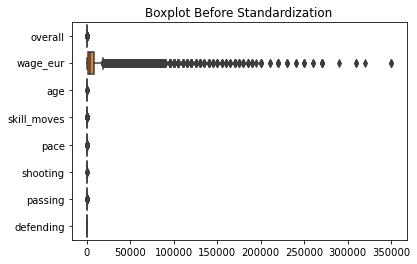

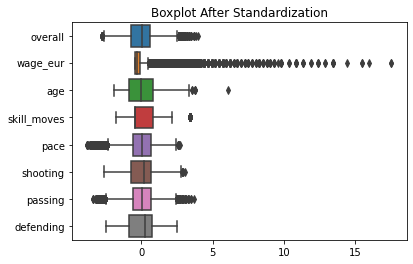

In [9]:
# Assuming df_selected is your DataFrame with selected features
# You can replace this with your actual DataFrame

# Show boxplots of the original dataset before standardization
sns.boxplot(data=df_subset, orient='h')
plt.title('Boxplot Before Standardization')
plt.show()

# Perform Standardization
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_subset), columns=df_subset.columns)

# Show boxplots of the dataset after standardization
sns.boxplot(data=df_scaled, orient='h')
plt.title('Boxplot After Standardization')
plt.show()


### 🎨 **Dipingendo il Quadro** 🎨

Un'immagine vale più di mille numeri! Questa cella ci dà delle informazioni preziose sui nostri dati, e gli esperti ML engineer usano questi grafici e molti altri per approfondire o escludere alcuni modelli.


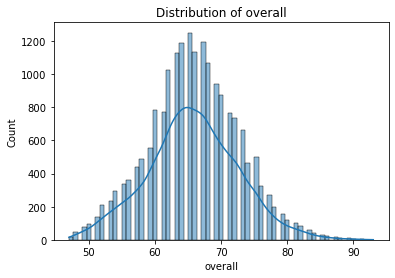

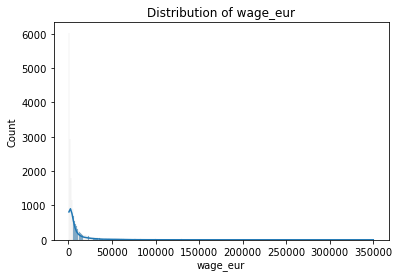

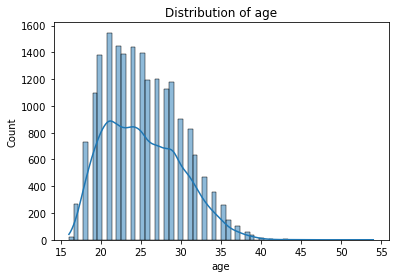

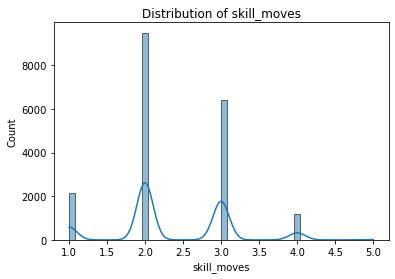

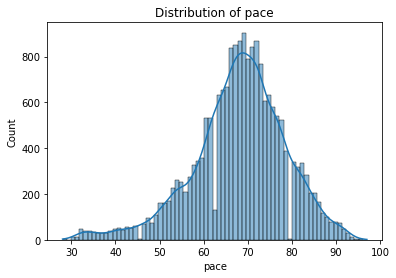

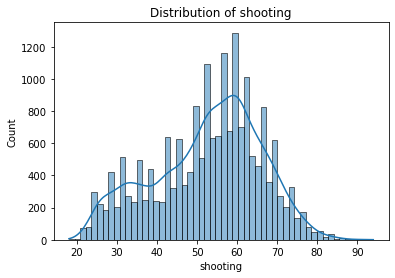

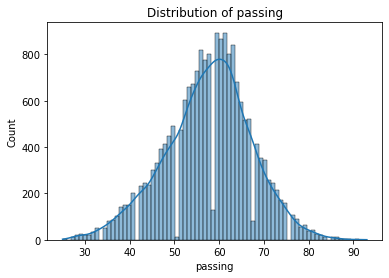

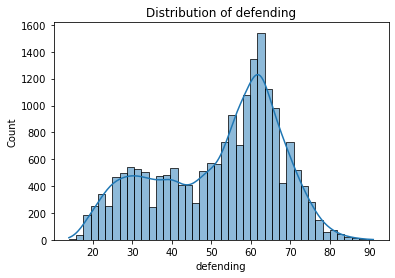

In [10]:

# Data Distribution
selected_features = subset
for feature in selected_features:
    sns.histplot(df_subset[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


### Matrice di Correlazione

📊 **Cos'è una Matrice di Correlazione?**
Una matrice di correlazione è un tabellone che mostra il grado di relazione tra variabili diverse. I valori variano da -1 a +1, dove -1 indica una correlazione negativa perfetta, +1 una correlazione positiva perfetta, e 0 nessuna correlazione.

📚 **Perché è Importante?**
1. **Comprensione delle Variabili**: Ti aiuta a capire come una variabile è correlata con le altre.
2. **Selezione delle Caratteristiche**: Spesso usato per la selezione delle caratteristiche che saranno utilizzate per l'addestramento del modello.
3. **Prevenzione di Problemi**: La presenza di correlazioni elevate tra variabili può causare problemi di multicollinearità nel modello.

🚫 **Perché la Correlazione tra le Caratteristiche è Negativa?**
1. **Ridondanza**: Se due caratteristiche sono fortemente correlate, portano le stesse informazioni, rendendo una di esse superflua.
2. **Multicollinearità**: In presenza di correlazione elevata, è difficile per il modello distinguere l'effetto isolato di una singola caratteristica, che può portare a sovradattamento e rendere difficile l'interpretazione del modello.
3. **Efficienza Computazionale**: Algoritmi con meno caratteristiche sono più efficienti in termini di tempo e memoria.

🛠️ **Applicazione Pratica**
Nel nostro caso, useremo la matrice di correlazione per esaminare la relazione tra un sottoinsieme di caratteristiche nel nostro set di dati. Questo ci aiuterà a prendere decisioni informate durante la fase di selezione delle caratteristiche.


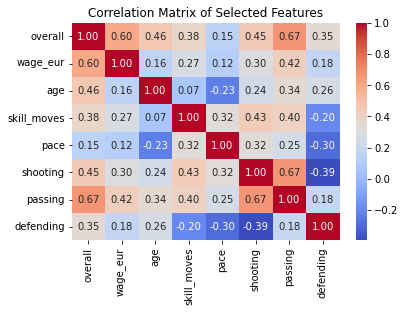

In [11]:

# Correlation Analysis
correlation_matrix = df_scaled[selected_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Selected Features')
plt.show()


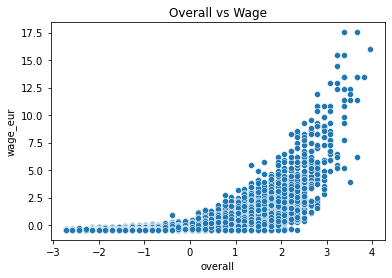

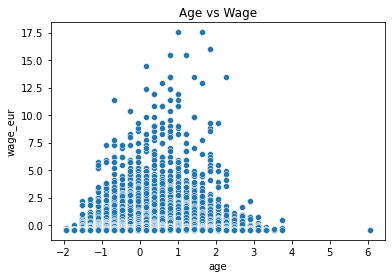

In [12]:

# Scatter plots for Overall vs Wage and Age vs Wage
sns.scatterplot(x='overall', y='wage_eur', data=df_scaled)
plt.title('Overall vs Wage')
plt.show()

sns.scatterplot(x='age', y='wage_eur', data=df_scaled)
plt.title('Age vs Wage')
plt.show()


### Split del dataset e Addestramento del Modello di Regressione Lineare

🔪 **Split del Dataset**
Prima di procedere all'addestramento del modello, è fondamentale dividere il set di dati in due parti: un set di addestramento e un set di test. Il primo servirà per addestrare il modello, mentre il secondo per valutarne le prestazioni.

🎲 **Come Funziona?**
Utilizziamo la funzione `train_test_split` per effettuare questa divisione. In genere, circa l'80% dei dati viene utilizzato per l'addestramento e il restante 20% per il test, anche se queste proporzioni possono variare in base alle esigenze specifiche.

📈 **Regressione Lineare in Azione**
Dopo la divisione, usiamo la classe `LinearRegression` per addestrare un modello di regressione lineare sul set di addestramento. L'obiettivo è trovare la linea (o in generale, un iperpiano in più dimensioni) che meglio approssima la relazione tra le variabili indipendenti e dipendenti.

🛠️ **Passaggi Fondamentali**
1. Creare un oggetto `LinearRegression`.
2. Utilizzare il metodo `fit` per addestrare il modello sui dati di addestramento.
3. Osservare i coefficienti e l'intercetta per capire come ogni caratteristica influisce sul target.

📚 **Perché è Importante?**
La regressione lineare è uno dei modelli più semplici, ma potenti, utilizzati nel machine learning. È un ottimo punto di partenza per la comprensione dei concetti fondamentali dell'apprendimento supervisionato.

🎯 **Obiettivo Finale**
L'addestramento del modello ci permette di fare previsioni su nuovi dati e di comprendere quali fattori sono più influenti per la variabile di interesse.


In [13]:

# Simple Linear Regression Model
X = df_scaled[['overall', 'age', 'skill_moves', 'pace', 'shooting', 'passing', 'defending']]
y = df_scaled['wage_eur']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print(lr_model.coef_)
print(lr_model.feature_names_in_)
print(lr_model.intercept_)

[ 0.63738847 -0.15694735  0.0354504  -0.03177423  0.03524064  0.01324037
  0.01015327]
['overall' 'age' 'skill_moves' 'pace' 'shooting' 'passing' 'defending']
0.0026536484100556324


### Model Evaluation

Dopo l'addestramento arriva il momento di **testare** il nostro modello. Significa che prendiamo i dati di test (N.B. sono dati che il nostro modello **non ha mai visto**) e facciamo delle predizioni su questi dati.

Dopo prendiamo una **metrica** di riferimento e controlliamo quanto le predizioni effettuate in questa fase siano *lontane* dai valori reali. Per misurare queste performance usiamo la funzione MSE (Mean Squared Error), la cui formula è:

$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

In questa cella usiamo anche un'altra metrica, chiamata $R^2$; valori vicini ad 1 indicano una buona performance, valori negativi una pessima performance, un valore pari a zero significa che il modello predice sempre il valore medio dei dati.

In [14]:
y_pred_lr = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)
print(f"Mean Squared Error: {mse}, R-squared: {r2}")

Mean Squared Error: 0.5888024150039327, R-squared: 0.38885571020022724



## Introduction Gradient Descent

`LinearRegressor` utilizza il metodo dei minimi quadrati per trovare i coefficenti della Regressione Lineare.

In questa sezione utilizzeremo `SGDRegressor` invece di `LinearRegression` per introdurre il concetto di iperparametri. "SGDRegressor" è un modello di regressione lineare che funziona con **discesa del gradiente**, che è la tecnica con cui si addestrano tutti i modelli di machine learning nell'apprendimento supervisionato. SGDRegressor ha vari *iperparametri* come "alpha" per la regolarizzazione, "learning_rate" e "max_iter" per il numero massimo di iterazioni.

In questo caso stiamo anche facendo una `partial_fit` per fare in modo che epoca per epoca teniamo traccia del valore della funzione di costo (sul set di **validazione**) per fare in modo da capire come evolve l'addestramento del modello nel tempo.


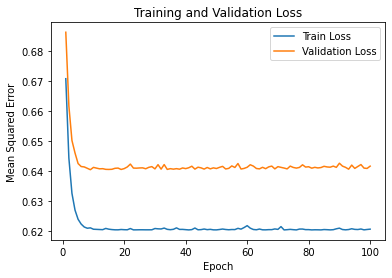

SGDRegressor - Mean Squared Error: 0.5889515661063167, R-squared: 0.38870089961824505


In [15]:


X = df_scaled[['overall', 'age', 'skill_moves', 'pace', 'shooting', 'passing', 'defending']]
y = df_scaled['wage_eur']

# Split the dataset into 60% training, 20% validation, and 20% testing
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)



# Define the hyperparameters
sgd_params = {
    'alpha': 0.0001, # Regularization term
    'eta0': 0.0001,    # Learning Rate
    'learning_rate': 'constant',  # Learning rate schedule
    'max_iter': 1    # Maximum number of iterations
}

# Initialize the SGDRegressor model with hyperparameters
# sgd_model = SGDRegressor(max_iter=1000)
# sgd_model.fit()

# Initialize lists to store loss values
train_loss = []
val_loss = []

# Initialize the SGDRegressor model
sgd_model = SGDRegressor(warm_start=True, **sgd_params)

# Number of epochs
n_epochs = 100
# Loop through each epoch
for epoch in range(n_epochs):

    # Fit the model with the training data
    sgd_model.partial_fit(X_train, y_train)

    # Compute the loss on the training data and append to train_loss list
    train_loss.append(mean_squared_error(y_train, sgd_model.predict(X_train)))

    # Compute the loss on the validation data and append to val_loss list
    val_loss.append(mean_squared_error(y_val, sgd_model.predict(X_val)))

# Plotting the training and validation loss
plt.plot(range(1, n_epochs + 1), train_loss, label='Train Loss')
plt.plot(range(1, n_epochs + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


# Evaluate the model
y_pred_sgd = sgd_model.predict(X_test)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

print(f"SGDRegressor - Mean Squared Error: {mse_sgd}, R-squared: {r2_sgd}")


## Bonus Track: Feature Selection con RFECV

### Proviamo un altro modello

In questa cella proveremo ad addestrare un modello diverso (un po'più complesso di una semplice regressione lineare), vedremo le sue performance in fase di test e le confronteremo con l'SGDRegressor

In [16]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    random_state=42
)


rf.fit(X_train, y_train)


y_pred_test_rfg = rf.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test_rfg)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test_rfg)



print("Random Forest MSE test:", mse_test)
print("Random Forest RMSE test:", rmse_test)
print("Random Forest R-squared test:", r2_test)

print("SGD regressor MSE test:", mse_sgd)
print("SGD regressor RMSE test:", np.sqrt(mse_sgd))
print("SGD regressor test:", r2_sgd)


Random Forest MSE test: 0.23697880923807613
Random Forest RMSE test: 0.48680469311426744
Random Forest R-squared test: 0.7540291235584818
SGD regressor MSE test: 0.5889515661063167
SGD regressor RMSE test: 0.7674317989934458
SGD regressor test: 0.38870089961824505


Questo algoritmo funziona molto meglio!

Ad ulteriore conferma di questo andiamo a plottare un grafico che contiene sull'asse X i valori reali del dataset, sull'asse Y i valori predetti.

Più questi punti sono vicini alla bisettrice del primo/terzo quadrante, più il modello sarà efficace!

In [17]:
data1 = pd.DataFrame({'Real': y_test, 'Predicted': y_pred_sgd})
data2 = pd.DataFrame({'Real': y_test, 'Predicted': y_pred_test_rfg})

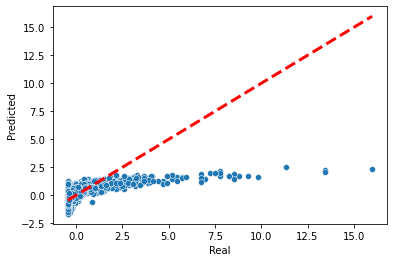

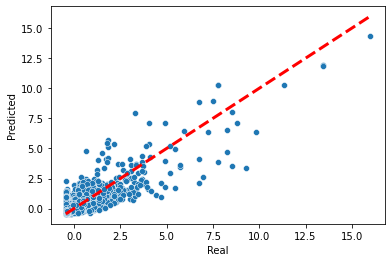

In [18]:
sns.scatterplot(data=data1, x='Real', y='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

sns.scatterplot(data=data2, x='Real', y='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

### Selezione delle Caratteristiche con RFECV (Recursive Feature Elimination with Cross-Validation)

🎯 **Cos'è RFECV?**
RFECV sta per "Recursive Feature Elimination with Cross-Validation". È un metodo automatico per selezionare le caratteristiche più importanti per il modello, utilizzando la validazione incrociata per evitare il sovradattamento.

📚 **Principi di Base**
RFECV inizia utilizzando tutte le caratteristiche per addestrare il modello e calcolare una metrica di performance (ad es., accuracy per la classificazione o MSE per la regressione). Successivamente, elimina la caratteristica meno importante e ripete il processo fino a quando tutte le caratteristiche sono state esaminate.

🔁 **Come Funziona?**
1. Addestra il modello su tutte le caratteristiche e valuta la performance con la Cross Validation.
2. Rimuovi la caratteristica meno importante.
3. Ripeti i passaggi 1 e 2 fino a quando non rimangono caratteristiche.
4. Scegli il sottoinsieme di caratteristiche che ha dato la migliore performance.

📈 **Cross Validation**
La validazione incrociata è fondamentale in questo processo per assicurare che il modello sia robusto e generalizzabile, riducendo il rischio di sovradattamento.

🛠️ **Implementazione**
Utilizzeremo la classe `RFECV` da scikit-learn per implementare questa tecnica sul nostro set di dati.

📚 **Perché è Importante?**
La selezione delle caratteristiche è un passaggio cruciale nel processo di modellazione. Può migliorare le prestazioni del modello, ridurre la complessità e aumentare la velocità di addestramento.



In [19]:

# Feature Selection with RFECV
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold



# Prepare the data (using the cleaned DataFrame with only numeric columns)
X_all = df_imputed.select_dtypes(include=['float64', 'int64']).drop(columns=['wage_eur'])
y_all = df_imputed['wage_eur']

min_features_to_select = 1  # Minimum number of features to consider

rfecv = RFECV(
    estimator=LinearRegression(),
    step=1,
    cv=KFold(n_splits=5),
    scoring='neg_mean_squared_error',
    min_features_to_select=min_features_to_select
)


# Create the RFE object and compute a cross-validated score
rfecv.fit(X_all, y_all)

# Number of selected features and their names
selected_features_count = rfecv.n_features_
selected_features_names = X_all.columns[rfecv.support_]

# Print the selected features
print(f"Number of selected features: {selected_features_count}")
print(f"Selected features: {selected_features_names.tolist()}")


Number of selected features: 59
Selected features: ['sofifa_id', 'overall', 'potential', 'value_eur', 'age', 'height_cm', 'weight_kg', 'club_team_id', 'league_level', 'club_jersey_number', 'club_contract_valid_until', 'nationality_id', 'nation_team_id', 'nation_jersey_number', 'weak_foot', 'skill_moves', 'international_reputation', 'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defendin